# Gentrification And Commercial Decisions: 
### Can We Predict Starbucks/Walmart Location Counts Using Gentrification Markers?

##### Our Gentrification Metrics
We developed three metrics for building our model features: 
- change in median household income
- change in median home values
- change in the percentage of the population possessing a bachelors degree or higher
    
These are the variables used by the Harvard Kennedy School Ash Center, which has been developing metrics for measuring gentrification since 2013. The US Census ACS5 API can call each of these metrics, enabling us to find change over time. However, because we don't have data on when each of these locations opened, we thought looking at longitudinal change over time may show more patterns in our data, rather than a single snapshot in time.
    
##### Why Starbucks? Why Walmart?
Our own assumptions and biases, especially in a nationally recognized zone of significant gentrification (the Portland area), were the basis for choosing our dependent variable locations.
    
##### How did we handle missing data?
The average amount of NaN values in each feature was between 3%-5%, a value which we thought was within the acceptable range to minimize skew.
    
##### What were our findings?
Overall, we see little to no correlation between gentrification markers between 2011-2018 and the number of each dependent store. Walmarts can be predicted a little better than Starbucks, but we don't believe either company heavily utilized these metrics in deciding on opening new locations based on our data. We cannot fully assume this, however, due to the discussed weak areas in our data discussed below.
    
##### What were the weak points in our data?
- We did not possess any data on when new locations were opened for each of these locations, which means that many of them existed prior to the calculation of our gentrification variables. This also illustrates that the inverse hypothesis does not hold true, as gentrification does not appear to occur in any easily predictable measure in areas that already may have Starbucks or Walmart locations from before our data collection.
- Our dataset was limited to 2011 and onwards, as many of these measures were not available in previous estimate datasets.
- Our own biases in the Portland area assumed more mixed-use neighborhood distribution across the country. We assume that zipcodes with the highest gentrification markers are most likely residential-only areas that may not have any commercial operations within their boundaries.

# DATA CLEANING

In [1]:
# dependencies
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
from census import Census
from us import states
import seaborn as sns

# census API key
from config import api_key

### 2011 Census Call

In [2]:
# Saving variables for readability
mhi = 'B19013_001E'
mhv = 'B25077_001E'
wbd = 'B99151_001E'

# Instantiating census object
c = Census(api_key, year=2011)

In [3]:
# Creating DFs for each variable so as to have access to all zipcodes
income_df = pd.DataFrame(c.acs5.zipcode(mhi, Census.ALL))
housing_df = pd.DataFrame(c.acs5.zipcode(mhv, Census.ALL))
bachelors_df = pd.DataFrame(c.acs5.zipcode(wbd, Census.ALL))
total_df = pd.DataFrame(c.acs5.zipcode('B01003_001E', Census.ALL))

# Merging DFs on zipcodes
df11 = income_df.merge(housing_df, on='zip code tabulation area')
df11 = df11.merge(bachelors_df, on='zip code tabulation area')
df11 = df11.merge(total_df, on='zip code tabulation area')

# Renaming columns
df11 = df11.rename(columns={'B19013_001E': 'Median Household Income', 'zip code tabulation area': 'Zip', 'B25077_001E': 'Median Home Value', 'B01003_001E': 'Total Population', 'B99151_001E': 'Have Bachelors+'})

# Creating column to measure % of individuals with a bachelors degree or higher
# df11['% Bachelors+'] = round(df11['Have Bachelors+']/df11['Total Population'] * 100, 2)

# Reorganizing columns
df11 = df11[['Zip', 'Median Household Income', 'Median Home Value', 'Have Bachelors+']]

In [4]:
# Cleaning up corrupted null values, imputing actual nulls into them
df11['Median Household Income'] = [np.nan if i<0 else i for i in df11['Median Household Income']]
df11['Median Home Value'] =[np.nan if i<0 else i for i in df11['Median Home Value']]
df11['Have Bachelors+'] = [np.nan if i<0 else i for i in df11['Have Bachelors+']]
df11['Have Bachelors+'] = [np.nan if np.isinf(i) else i for i in df11['Have Bachelors+']]

In [5]:
# Replacing null values with the mean of each column
df11['Median Household Income'] = df11['Median Household Income'].fillna(df11['Median Household Income'].mean())
df11['Median Home Value'] = df11['Median Home Value'].fillna(df11['Median Home Value'].mean())
df11['Have Bachelors+'] = df11['Have Bachelors+'].fillna(df11['Have Bachelors+'].mean())

In [6]:
# Examining null count
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 0 to 33119
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip                      33120 non-null  object 
 1   Median Household Income  33120 non-null  float64
 2   Median Home Value        33120 non-null  float64
 3   Have Bachelors+          33120 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


### 2018 Census Call

In [7]:
c = Census(api_key, year=2018)

In [8]:
# Creating DFs for each variable so as to have access to all zipcodes
income_df = pd.DataFrame(c.acs5.zipcode(mhi, Census.ALL))
housing_df = pd.DataFrame(c.acs5.zipcode(mhv, Census.ALL))
bachelors_df = pd.DataFrame(c.acs5.zipcode(wbd, Census.ALL))
total_df = pd.DataFrame(c.acs5.zipcode('B01003_001E', Census.ALL))

# Merging DFs on zipcodes
df18 = income_df.merge(housing_df, on='zip code tabulation area')
df18 = df18.merge(bachelors_df, on='zip code tabulation area')
df18 = df18.merge(total_df, on='zip code tabulation area')

# Renaming columns
df18 = df18.rename(columns={'B19013_001E': 'Median Household Income', 'zip code tabulation area': 'Zip', 'B25077_001E': 'Median Home Value', 'B01003_001E': 'Total Population', 'B99151_001E': 'Have Bachelors+'})

# Creating column to measure % of individuals with a bachelors degree or higher
# df18['% Bachelors+'] = round(df18['Have Bachelors+']/df18['Total Population'] * 100, 2)

# Reorganizing columns
df_nc = df18[['Zip', 'Total Population', 'Median Household Income', 'Median Home Value', 'Have Bachelors+']]
df18 = df18[['Zip', 'Median Household Income', 'Median Home Value', 'Have Bachelors+']]

In [9]:
# Cleaning up corrupted null values, imputing actual nulls into them
df18['Median Household Income'] = [np.nan if i<0 else i for i in df18['Median Household Income']]
df18['Median Home Value'] =[np.nan if i<0 else i for i in df18['Median Home Value']]
df18['Have Bachelors+'] = [np.nan if i<0 else i for i in df18['Have Bachelors+']]
df18['Have Bachelors+'] = [np.nan if np.isinf(i) else i for i in df18['Have Bachelors+']]

In [10]:
# Replacing null values with the mean of each column
df18['Median Household Income'] = df18['Median Household Income'].fillna(df18['Median Household Income'].mean())
df18['Median Home Value'] = df18['Median Home Value'].fillna(df18['Median Home Value'].mean())
df18['Have Bachelors+'] = df18['Have Bachelors+'].fillna(df18['Have Bachelors+'].mean())

In [11]:
# Examining null count
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 0 to 33119
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip                      33120 non-null  object 
 1   Median Household Income  33120 non-null  float64
 2   Median Home Value        33120 non-null  float64
 3   Have Bachelors+          33120 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


### Combining 2011 and 2018 data to get change values

In [12]:
# Combining 2011 and 2018 DataFrames
df_combined = df11.merge(df18, on='Zip')
df_combined

,Zip,Median Household Income_x,Median Home Value_x,Have Bachelors+_x,Median Household Income_y,Median Home Value_y,Have Bachelors+_y
0,00601,13318.0,103200.0,11724.0,13092.000000,86200.00000,11838.0
1,00602,14947.0,89300.0,27432.0,16358.000000,86300.00000,27411.0
2,00603,14437.0,116700.0,36436.0,16603.000000,122400.00000,34274.0
3,00606,11155.0,101000.0,4038.0,12832.000000,91600.00000,4516.0
4,00610,16367.0,109400.0,19302.0,19309.000000,88600.00000,19164.0
...,...,...,...,...,...,...,...
33115,99923,27500.0,108300.0,77.0,59031.427924,194562.64461,15.0
33116,99925,43125.0,164400.0,525.0,57375.000000,174500.00000,643.0
33117,99926,45216.0,101100.0,919.0,53409.000000,143100.00000,1019.0
33118,99927,17639.0,123800.0,67.0,59031.427924,272500.00000,38.0


In [13]:
# Creating columns showing change in year range
# Creating columns showing change in year range
df_combined['Household Income Change'] = (df_combined['Median Household Income_y'] - df_combined['Median Household Income_x']) / df_combined['Median Household Income_x']
df_combined['Median Home Value Change'] = (df_combined['Median Home Value_y'] - df_combined['Median Home Value_x']) / df_combined['Median Home Value_x']
df_combined['% Bachelors+ Change'] = (df_combined['Have Bachelors+_y'] - df_combined['Have Bachelors+_x']) / df_combined['Have Bachelors+_x']

In [14]:
# Creating final dataframe using relevant columns
df_change = df_combined[['Zip', 'Household Income Change', 'Median Home Value Change', '% Bachelors+ Change']]

In [15]:
df_change['Zip'] = df_change['Zip'].astype('int64')

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_change

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change
0,601,-0.016970,-0.164729,0.009724
1,602,0.094400,-0.033595,-0.000766
2,603,0.150031,0.048843,-0.059337
3,606,0.150336,-0.093069,0.118375
4,610,0.179752,-0.190128,-0.007150
...,...,...,...,...
33115,99923,1.146597,0.796516,-0.805195
33116,99925,0.330435,0.061436,0.224762
33117,99926,0.181197,0.415430,0.108814
33118,99927,2.346643,1.201131,-0.432836


### Starbucks Data

In [17]:
%%html
<div class='tableauPlaceholder' id='viz1607403574641' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ch&#47;chnage11-18&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='chnage11-18&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ch&#47;chnage11-18&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607403574641');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1220px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1220px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [18]:
# Read in data
sb_data = pd.read_csv('data_exploration/data/directory.csv')

In [19]:
# Count how many US stores exist by their ownership type
sb_data.loc[sb_data['Country'] == 'US']['Ownership Type'].value_counts()

Company Owned    8226
Licensed         5382
Name: Ownership Type, dtype: int64

In [20]:
# Exploring US only data
sb_data.loc[sb_data['Country'] == 'US']

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,907-339-0900,GMT-09:00 America/Anchorage,-149.78,61.21
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,995073444,907-339-2800,GMT-09:00 America/Anchorage,-149.84,61.14
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,995153596,907-339-1300,GMT-09:00 America/Anchorage,-149.85,61.11
11967,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,(907) 227-9631,GMT-09:00 America/Anchorage,-149.89,61.13
11968,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,995152050,907-344-4160,GMT-09:00 America/Anchorage,-149.86,61.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25567,Starbucks,74385-87621,Safeway-Laramie #2466,Licensed,554 N 3rd St,Laramie,WY,US,820723012,307-721-5107,GMT-07:00 America/Denver,-105.59,41.32
25568,Starbucks,73320-24375,Ridley's - Laramie #1131,Licensed,3112 E. Grand,Laramie,WY,US,820705141,307-742-8146,GMT-07:00 America/Denver,-105.56,41.31
25569,Starbucks,22425-219024,Laramie - Grand & 30th,Company Owned,3021 Grand Ave,Laramie,WY,US,82070,307-742-3262,GMT-07:00 America/Denver,-105.56,41.31
25570,Starbucks,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,118 Westland Way,Rock Springs,WY,US,829015751,307-362-7145,GMT-07:00 America/Denver,-109.25,41.58


In [21]:
# Creating new dataframe with only US data, drop one null zip
sb_zeroed = sb_data.loc[sb_data['Country'] == 'US'].dropna()

In [22]:
# Creates a table of 5-digit zipcodes
splits = [int(''.join(str(i).split())[:5]) for i in sb_zeroed['Postcode']]

In [23]:
# Adds a zip column made up of only the 5-digit zipcodes
sb_zeroed['Zip'] = splits

In [24]:
# Creating groupby object to count the number of stores in each zipcode
sb_groupby = sb_zeroed.groupby('Zip')

In [25]:
# Create store count, build new dataframe with the zipcode and a single count
sb_count = sb_groupby.count()
sb_df = pd.DataFrame(sb_count['Brand']).reset_index()

In [26]:
# Merge Starbucks data with Census data
df = df_change.merge(sb_df, how='left', on='Zip')

In [27]:
df = df.fillna(0)

In [28]:
df

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change,Brand
0,601,-0.016970,-0.164729,0.009724,0.0
1,602,0.094400,-0.033595,-0.000766,0.0
2,603,0.150031,0.048843,-0.059337,0.0
3,606,0.150336,-0.093069,0.118375,0.0
4,610,0.179752,-0.190128,-0.007150,0.0
...,...,...,...,...,...
33115,99923,1.146597,0.796516,-0.805195,0.0
33116,99925,0.330435,0.061436,0.224762,0.0
33117,99926,0.181197,0.415430,0.108814,0.0
33118,99927,2.346643,1.201131,-0.432836,0.0


In [29]:
# Impute null data with zeroes
df['Brand'] = df['Brand'].fillna(0)

In [30]:
# Full dataframe including dependent variable (store count). Incudes Zips without a location.
starbucks_df = df.rename(columns={'Brand': 'Store Count'})

In [31]:
# Full dataframe including dependent variable (store count). Does NOT include Zips without a location.
starbucks_without = df.loc[starbucks_df['Store Count'] != 0]
starbucks_without

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change,Brand
30,12866,0.245664,0.250828,0.097164,4.0
42,12901,0.145176,0.076046,-0.009954,2.0
75,12946,0.247896,-0.012228,-0.172140,1.0
122,13032,0.055351,0.244267,-0.091354,1.0
128,13039,0.220819,0.074422,0.023830,1.0
...,...,...,...,...,...
33020,99701,0.129938,0.008086,-0.066228,2.0
33024,99705,0.017664,0.128167,0.138263,1.0
33026,99709,0.212635,0.087199,-0.018987,3.0
33095,99801,0.133143,0.147049,0.072378,2.0


In [32]:
# Send both dataframes to CSV
starbucks_df.to_csv('data_exploration/full_us_data.csv')
starbucks_without.to_csv('data_exploration/us_data.csv')

### Walmart Data

In [33]:
%%html
<div class='tableauPlaceholder' id='viz1607479662223' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project3_16069712161590&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project3_16069712161590&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project3_16069712161590&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607479662223');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1750px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1750px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [34]:
# Import Walmart data
wal_data = pd.read_csv('data_exploration/data/walmartstoreloaction.csv')

In [35]:
# View countries represented in data
wal_data['country'].value_counts()

US    4636
PR      18
Name: country, dtype: int64

In [36]:
# Exclude superfluous columns
wal_trimmed = wal_data[['name','street_address','city','state','zip_code','country','latitude','longitude']]

# Rename remaining columns
wal_trimmed = wal_trimmed.rename(columns={'name': 'Location Name', 'street_address': 'Address', 'city': 'City', 'state': 'State', 'zip_code': 'Zip', 'country': 'Country', 'latitude': 'Lat','longitude':'Long'})

# Added 'Brand' column for counting purposes
wal_trimmed['Brand']='Walmart'
wal_trimmed.head()

,Location Name,Address,City,State,Zip,Country,Lat,Long,Brand
0,Conway Supercenter,1155 Hwy 65 North,Conway,AR,72032,US,35.108660,-92.436905,Walmart
1,Sikeston Supercenter,1303 S Main St,Sikeston,MO,63801,US,36.857394,-89.586051,Walmart
2,Tahlequah Supercenter,2020 S Muskogee Ave,Tahlequah,OK,74464,US,35.888765,-94.979859,Walmart
3,Mountain Home Supercenter,65 Wal Mart Dr,Mountain Home,AR,72653,US,36.354957,-92.341026,Walmart
4,Claremore Supercenter,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,36.293955,-95.627125,Walmart


In [37]:
# Group by Zip
wal_groupby = wal_trimmed.groupby('Zip')

In [38]:
wal_count = wal_groupby.count()
wal_df = pd.DataFrame(wal_count['Brand']).reset_index()

In [39]:
# Merge Walmart data with Census + Starbucks data
df_both_stores = df.merge(wal_df, how='left', on='Zip')

In [40]:
# Impute null data with zeroes
df_both_stores['Brand_x'] = df_both_stores['Brand_x'].fillna(0)
df_both_stores['Brand_y'] = df_both_stores['Brand_y'].fillna(0)

In [41]:
# Full dataframe including dependent variable (store count). Incudes Zips without a location.
df_both_stores = df_both_stores.rename(columns={'Brand_x': 'Starbucks Store Count', 'Brand_y':'Walmart Store Count'})
walmart_df = df_both_stores.drop(columns='Starbucks Store Count')

In [42]:
walmart_df

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change,Walmart Store Count
0,601,-0.016970,-0.164729,0.009724,0.0
1,602,0.094400,-0.033595,-0.000766,0.0
2,603,0.150031,0.048843,-0.059337,0.0
3,606,0.150336,-0.093069,0.118375,0.0
4,610,0.179752,-0.190128,-0.007150,0.0
...,...,...,...,...,...
33115,99923,1.146597,0.796516,-0.805195,0.0
33116,99925,0.330435,0.061436,0.224762,0.0
33117,99926,0.181197,0.415430,0.108814,0.0
33118,99927,2.346643,1.201131,-0.432836,0.0


In [43]:
# Full dataframe including dependent variable (store count). Does NOT include Zips without a location.
df_both_stores_without = df_both_stores.loc[(df_both_stores['Walmart Store Count'] != 0) | (df_both_stores['Starbucks Store Count'] != 0)]
walmart_without = df_both_stores_without.drop(columns='Starbucks Store Count')

In [44]:
walmart_df.to_csv('data_exploration/walmart_full_us_data.csv')
walmart_without.to_csv('data_exploration/walmart_stores_only_data.csv')

# MACHINE TRAINING

# Starbucks Modelling: Zipcodes with Stores Only

In [45]:
starbucks_only = pd.read_csv('data_exploration/us_data.csv').drop(columns='Unnamed: 0')

In [46]:
starbucks_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in starbucks_only['% Bachelors+ Change']]
starbucks_only['% Bachelors+ Change'] = starbucks_only['% Bachelors+ Change'].fillna(starbucks_only['% Bachelors+ Change'].mean())

In [47]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

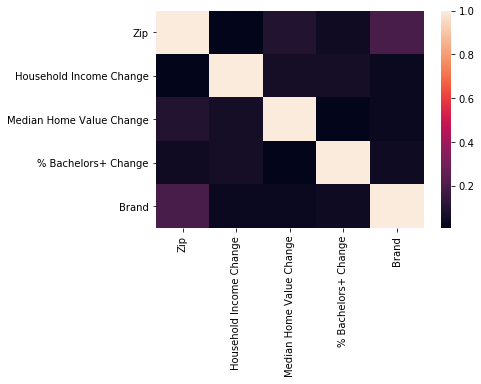

In [48]:
sns.heatmap(starbucks_only.corr())

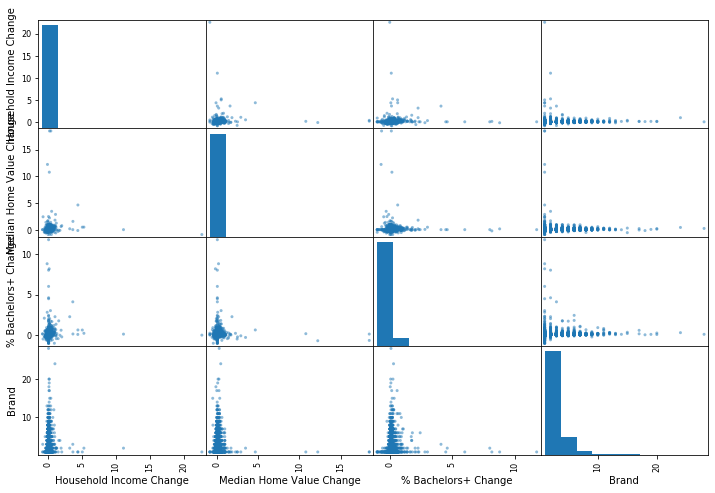

In [49]:
pd.plotting.scatter_matrix(starbucks_only.iloc[:, 1:], figsize=(12,8));

### Multiple Linear Regression

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.linear_model import LinearRegression
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [52]:
sb_multi = multi.score(X_test, y_test)

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -1.38 %
Standard Deviation: 3.90 %


### Support Vector Regression

In [54]:
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train.ravel())

SVR()

In [57]:
sb_svr = svr.score(X_test, y_test)

In [58]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train.ravel(), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -2.88 %
Standard Deviation: 2.22 %


### Decision Tree Regression

In [59]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [61]:
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [63]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
sb_tree = tree.score(X_test, y_test)

In [65]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -110.73 %
Standard Deviation: 38.55 %


### Random Forest Regression

In [66]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [67]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=10)

In [70]:
sb_rf = rf.score(X_test, y_test)

In [71]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train.ravel(), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -14.53 %
Standard Deviation: 9.66 %


# Walmart Modelling: Zipcodes with Stores Only

In [72]:
walmart_only = pd.read_csv('data_exploration/walmart_full_us_data.csv')
walmart_only = walmart_only.loc[walmart_only['Walmart Store Count'] != 0.0].drop(columns='Unnamed: 0')

In [73]:
walmart_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in walmart_only['% Bachelors+ Change']]
walmart_only['% Bachelors+ Change'] = walmart_only['% Bachelors+ Change'].fillna(walmart_only['% Bachelors+ Change'].mean())

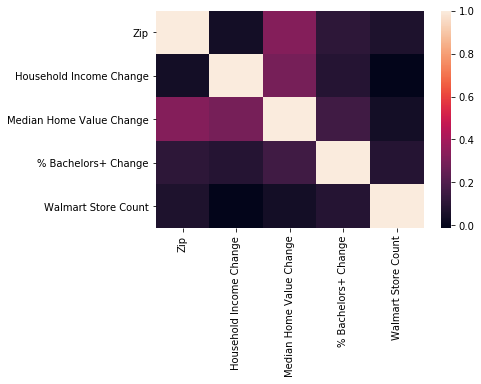

In [74]:
sns.heatmap(walmart_only.corr())

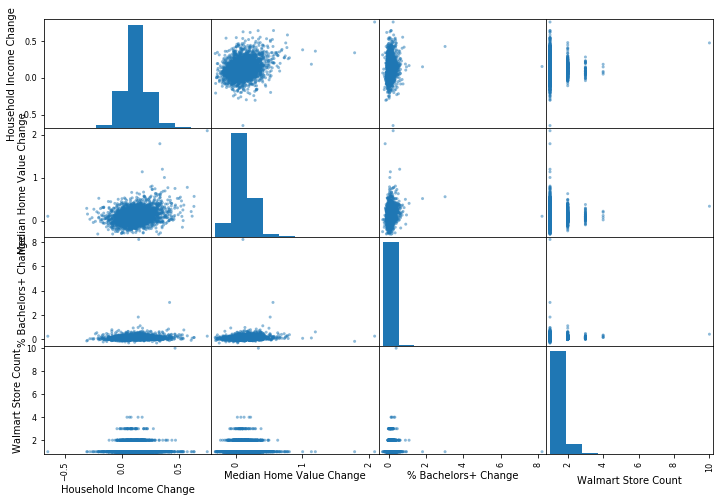

In [75]:
pd.plotting.scatter_matrix(walmart_only.iloc[:, 1:], figsize=(12,8));

### Multiple Linear Regression

In [76]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [79]:
wm_multi = multi.score(X_test, y_test)

In [80]:
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -1.47 %
Standard Deviation: 6.42 %


### Suport Vector Regression

In [81]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [82]:
y = y.reshape(len(y), 1)

In [83]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train.ravel())

SVR()

In [86]:
wm_svr = svr.score(X_test, y_test)

In [87]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train.ravel(), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -3.92 %
Standard Deviation: 1.54 %


### Decision Tree Regression

In [88]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [89]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [92]:
wm_tree = tree.score(X_test, y_test)

In [93]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -143.14 %
Standard Deviation: 128.56 %


### Random Forest Regression

In [94]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [95]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=10)

In [98]:
wm_rf = rf.score(X_test, y_test)

In [99]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train.ravel(), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -23.59 %
Standard Deviation: 17.24 %


# Comparing Data: Machine Learning Models on Zipcodes with Stores Only vs All Zipcodes

In [100]:
sb_match = [sb_multi, sb_svr, sb_tree, sb_rf]
wm_match = [wm_multi, wm_svr, wm_tree, wm_rf]
models = ['Multiple Regression', 'SVR', 'Decision Tree Regression', 'Random Forest Regression']

In [101]:
compare = pd.DataFrame()
compare['Model Type'] = models
compare['Starbucks'] = sb_match
compare['Walmart'] = wm_match

In [102]:
compare_full = pd.read_csv('full_us_compare.csv')

In [103]:
model_comparison = compare.merge(compare_full, on='Model Type').drop(columns='Unnamed: 0')

In [104]:
model_comparison

,Model Type,Starbucks,Walmart,Starbucks - Full US,Walmart - Full US
0,Multiple Regression,-0.002371,0.015619,0.001042,0.002589
1,SVR,-0.015947,-0.052885,-0.057317,-0.064115
2,Decision Tree Regression,-0.882849,-1.269541,-0.874926,-0.915713
3,Random Forest Regression,-0.071545,-0.150807,-0.033776,-0.040049


# Comparing with 2018-only Data

In [105]:
# Merge Starbucks data with 2018 only data
df_nc['Zip'] = df_nc['Zip'].astype('int64')
nc2018 = df_nc.merge(sb_df, how='left', on='Zip')

In [106]:
# Replace corrupted values with null values
nc2018['Median Household Income'] = [np.nan if i<0 else i for i in nc2018['Median Household Income']]
nc2018['Median Home Value'] =[np.nan if i<0 else i for i in nc2018['Median Home Value']]
nc2018['Have Bachelors+'] = [np.nan if i<0 else i for i in nc2018['Have Bachelors+']]

In [107]:
# Imputing null values with feature mean
nc2018['Median Household Income'] = nc2018['Median Household Income'].fillna(nc2018['Median Household Income'].mean())
nc2018['Median Home Value'] = nc2018['Median Home Value'].fillna(nc2018['Median Home Value'].mean())
nc2018['Have Bachelors+'] = nc2018['Have Bachelors+'].fillna(nc2018['Have Bachelors+'].mean())
nc2018['Brand'] = nc2018['Brand'].fillna(0)
nc2018 = nc2018.rename(columns={'Brand': 'Store Count'})

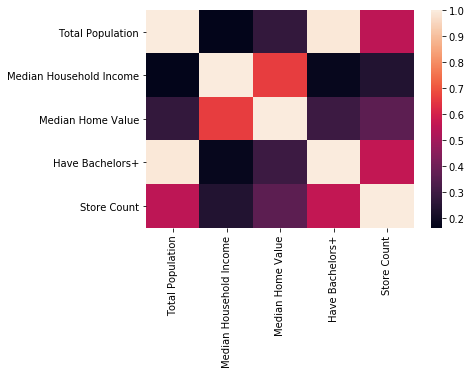

In [108]:
sns.heatmap(nc2018.iloc[:, 1:].corr())

In [109]:
%%html
<div class='tableauPlaceholder' id='viz1607404053680' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MachineLearningFinal_16074038256280&#47;StarbucksWalmartLocationsChangeinHHIbyZip&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MachineLearningFinal_16074038256280&#47;StarbucksWalmartLocationsChangeinHHIbyZip' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MachineLearningFinal_16074038256280&#47;StarbucksWalmartLocationsChangeinHHIbyZip&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607404053680');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1750px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1750px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1377px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>